In [110]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #vizualisation
import seaborn as sns#vizualisation

#importing classification models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#importing dataprocessing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing model evaluation tools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#import time
import time

In [111]:
#loading datasets
train_df = pd.read_csv(r'F:\Datasets\titanic\train.csv')
test_file = r'F:\Datasets\titanic\test.csv'
test_df = pd.read_csv(test_file)

In [112]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
train_df.info()
#here we can see that Name sex ticket cabin embarked columns are in Object datatypes
#these are to be converted to binary numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
test_df.info()
#columns Name, sex, ticket, embarked are object data types to be proceesed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [116]:
#dropping unnecessary attributes using drop function
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace = True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

In [117]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [118]:
#finding unique values in object datatype attributes by using unique() function
#train dataset
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [119]:
train_df['Embarked'].unique()
#embarked column is having NAN value 

array(['S', 'C', 'Q', nan], dtype=object)

In [120]:
train_df[train_df['Embarked'].isna()]
#there are two NAN to be replaced

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [121]:
#replacing NAN using replace function
train_df['Embarked'].fillna(value = 'C', inplace = True)

In [122]:
train_df[train_df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [123]:
#converting attributes with object data types to binary
train_df['Sex'].replace({'male':0, 'female': 1}, inplace = True)
train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace = True)

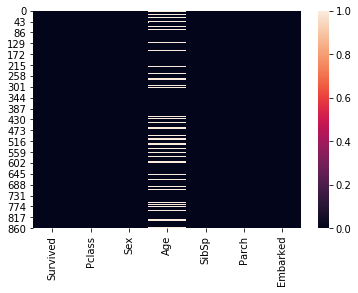

In [124]:
#looking for missing values by vizualization fro train data
sns.heatmap(data = train_df.isnull()) 
#here we can see that the attribute Age is have missing values

In [125]:
#filling missing values in Age attribute
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

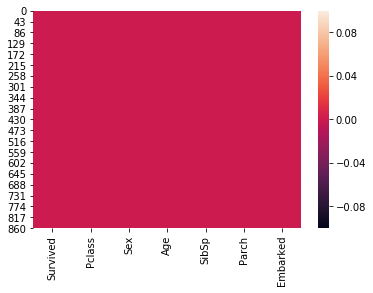

In [126]:
# visualising train data for missing values
sns.heatmap(train_df.isna())
#there are no missing values in train data set

In [127]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [128]:
test_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [129]:
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [130]:
#converting object data types to binary 
test_df['Sex'].replace({'male': 0, 'female': 1}, inplace = True)
test_df['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace = True)

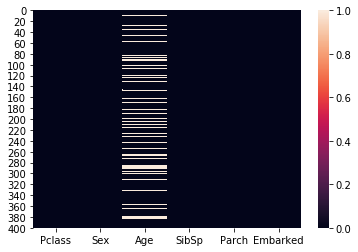

In [131]:
#vizualising test data for missing values
sns.heatmap(test_df.isna())
#age attribute is having missing values

In [132]:
#replacing missing values in age attribute with mean
test_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

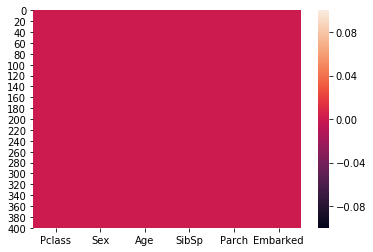

In [133]:
sns.heatmap(test_df.isna())

In [134]:
#training data sets
X_train = train_df.drop(['Survived'], axis = 1)
Y_train = train_df['Survived']
X_test = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [146]:
models = []
models.append(('Logistic Regression: ', LogisticRegression()))
models.append(('KNearestNeighbor: ', KNeighborsClassifier(n_neighbors = 3)))
models.append(('decisiontree: ', DecisionTreeClassifier()))
models.append(('SVM',  SVC( )))
models.append(('NaiveBayes: ', GaussianNB()))
models.append(('RandomForest: ', RandomForestClassifier(n_estimators = 5)))



In [148]:
num_folds = 10
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5, random_state=0)
    start = time.time()
    cv_results = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    end = time.time()
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea

Logistic Regression:  79.46393823363253
KNearestNeighbor:  79.46393823363253
decisiontree:  79.46393823363253
SVM 79.46393823363253
NaiveBayes:  79.46393823363253
RandomForest:  79.46393823363253


E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [140]:
from sklearn.pipeline import Pipeline
pipelines = []

pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('scaledlogisticregression', Pipeline([('Scaler', StandardScaler()),('logregression', LogisticRegression())])))
results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=0)
for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))


ScaledCART: 0.784569 (0.026376) (run time: 0.262381)
ScaledSVM: 0.828302 (0.037179) (run time: 0.395650)
ScaledNB: 0.780062 (0.025799) (run time: 0.111455)
ScaledKNN: 0.803645 (0.041490) (run time: 0.189688)
scaledlogisticregression: 0.794607 (0.023097) (run time: 0.127951)


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklea